In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Extraction

In [35]:
vacancies = pd.read_csv("../scraping/vacancies.csv")
vacancies

,vacancy,company,experience,views,applications,salary,technologies
0,Data Parser,Deep Knowledge Group,0,111,34,$1000-2000,"skills,entrepreneurship,supportive,presentatio..."
1,Python Team Lead,PLANEKS,3,29,5,NaN,"skills,meet,choose,budget,want,things,web,busi..."
2,Python Engineer,Unicsoft,5,36,5,NaN,"meet,huge,b2b,drive,things,businesses,end-to-e..."
3,Middle Backend Developer,BARVATECH,2,109,47,до $3000,"confluence,під,проєкти,ukrainian,духом,aiohttp..."
4,Data Engineer (машинне навчання),Rozetka,2,60,8,NaN,"dbt,адаптаціі,рядів,тестувальники,тестуємо,най..."
...,...,...,...,...,...,...,...
224,Tech Lead Full-stack Engineer (JS/Python),Softengi,5,29,1,$4000-5500,"softengi,skills,specialists,web,saas,principle..."
225,Python Developer in Europe only,Meduzzen,3,75,13,NaN,"skills,preferably,meet,core,follow,solutions,8..."
226,Python Software Engineer (Zakupki.Prom),EVO,1,313,79,NaN,"практикуватись,майданчиках,логування,командами..."
227,Team Lead Python developer,Academy SMART,5,25,5,NaN,"integrating,processing,love,skills,pivotal,wan..."


# Data Cleaning & Wrangling for technologies

In [36]:
# get technologies frequency
exploded_technologies = vacancies["technologies"].str.split(",").explode() # for all vacancies
# exploded_technologies = vacancies[vacancies["experience"] == 5]["technologies"].str.split(",").explode() # vacancies in which 5 years of experience are required, you can change years of experience
technologies_dummies = pd.get_dummies(exploded_technologies)
technologies_frequency = technologies_dummies.sum().sort_values(ascending=False)
technologies_frequency = technologies_frequency[technologies_frequency >= 10]
technologies_frequency

python         216
experience     175
team           171
development    157
work           155
              ... 
розвиток        10
результат       10
де              10
largest         10
initiative      10
Length: 994, dtype: int64

# Data Analysis & Visualization for technologies

<Axes: title={'center': 'Top 30 technologies on Djinni for Python Developer'}, xlabel='Technologies', ylabel='Number of mentions in vacancies'>

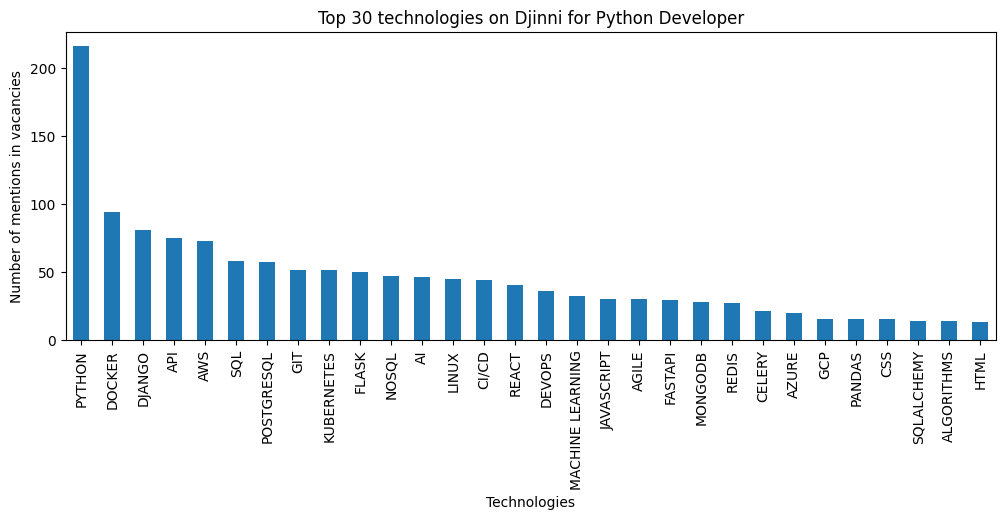

In [46]:
# visualizing top30 technologies by keyword frequency
top_technologies = np.array(["python", "aws", "docker", "api", "django", "sql", "postgresql", "celery", "git", "ci/cd", "ai", "kubernetes", "flask", "redis", "sqlalchemy", "devops", "react", "javascript", "linux", "agile", "nosql", "machine", "mongodb", "fastapi", "algorithms", "azure", "gcp", "pandas", "css", "html"])
top30_technologies = technologies_frequency.reindex(top_technologies, fill_value=0)
top30_technologies = top30_technologies.rename(index={"machine": "machine learning"})
top30_technologies.index = top30_technologies.index.str.upper()
top30_technologies = top30_technologies.sort_values(ascending=False)
top30_technologies.plot.bar(
    figsize=(12,4),
    title="Top 30 technologies on Djinni for Python Developer",
    xlabel="Technologies",
    ylabel="Number of mentions in vacancies"
)

# Data Cleaning & Wrangling for salary

In [38]:
#get min, max salary and avg salary
vacancies["min_salary"] = vacancies["salary"].str.extract(r"\$?(\d+)")
vacancies["max_salary"] = vacancies["salary"].str.extract(r"(\d+)$")
vacancies_with_salary = vacancies.dropna(subset=["min_salary", "max_salary"]).copy()
vacancies_with_salary["min_salary"] = vacancies_with_salary["min_salary"].astype(np.int16)
vacancies_with_salary["max_salary"] = vacancies_with_salary["max_salary"].astype(np.int16)
vacancies_with_salary["avg_salary"] = ((vacancies_with_salary["min_salary"] + vacancies_with_salary["max_salary"]) / 2).astype(np.int16)
vacancies_with_salary[["min_salary", "max_salary", "avg_salary"]]

,min_salary,max_salary,avg_salary
0,1000,2000,1500
3,3000,3000,3000
6,350,1200,775
7,500,2000,1250
10,4000,5500,4750
...,...,...,...
213,2000,3000,2500
217,350,1200,775
219,3500,5000,4250
221,3500,4000,3750


# Data Analysis & Visualization for salary, experience and other dependencies

<Axes: title={'center': 'Salary dependence on experience'}, xlabel='Experience', ylabel='Salary'>

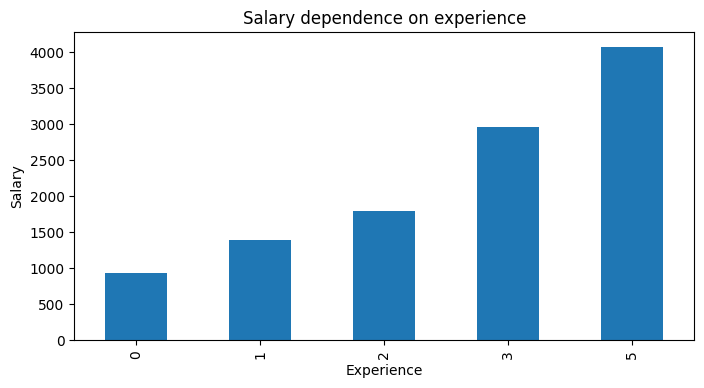

In [39]:
salary_experience = vacancies_with_salary.groupby("experience")["avg_salary"].mean()
salary_experience.plot.bar(xlabel="Experience", ylabel="Salary", figsize=(8,4), title="Salary dependence on experience")

<Axes: title={'center': 'Views dependence on salary'}, xlabel='Salary', ylabel='Views'>

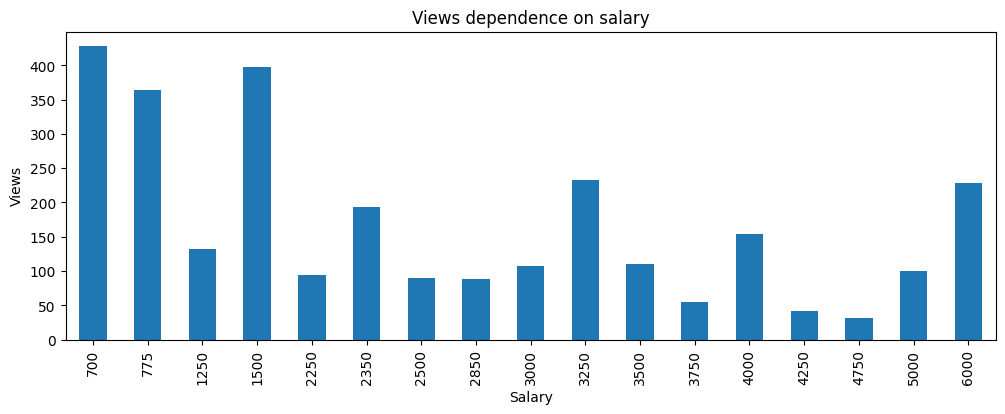

In [40]:
views_salary = vacancies_with_salary.groupby("avg_salary")["views"].mean()
views_salary.plot.bar(xlabel="Salary", ylabel="Views", figsize=(12,4), title="Views dependence on salary")

<Axes: title={'center': 'Applications dependence on salary'}, xlabel='Salary', ylabel='Applications'>

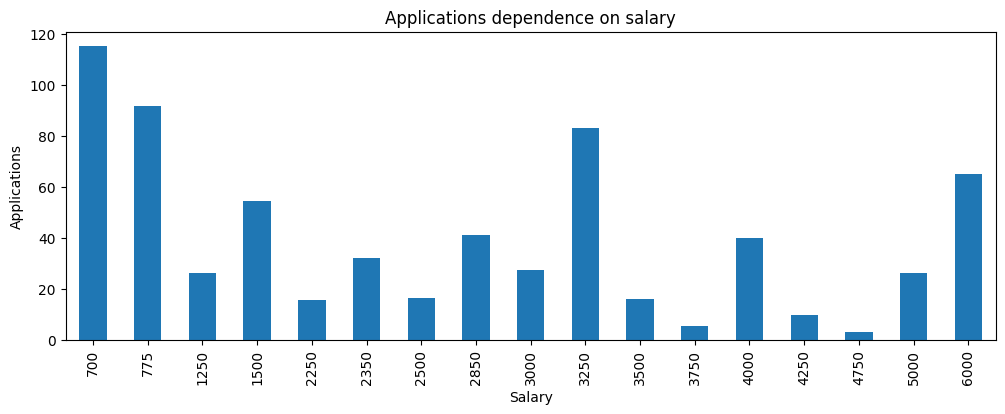

In [41]:
salary_applications = vacancies_with_salary.groupby("avg_salary")["applications"].mean()
salary_applications.plot.bar(xlabel="Salary", ylabel="Applications", figsize=(12,4), title="Applications dependence on salary")

<Axes: title={'center': 'Views dependence on experience'}, xlabel='Experience', ylabel='Views'>

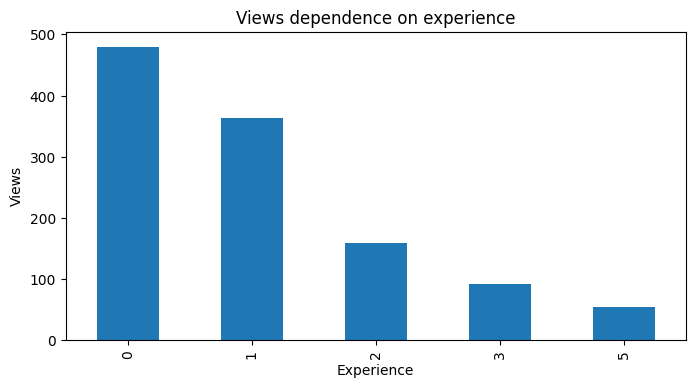

In [42]:
views_experience = vacancies.groupby("experience")["views"].mean()
views_experience.plot.bar(xlabel="Experience", ylabel="Views", figsize=(8,4), title="Views dependence on experience")

<Axes: title={'center': 'Applications dependence on experience'}, xlabel='Experience', ylabel='Applications'>

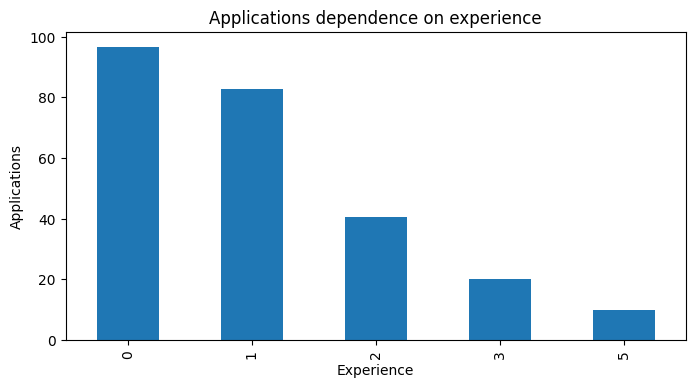

In [43]:
applications_experience = vacancies.groupby("experience")["applications"].mean()
applications_experience.plot.bar(xlabel="Experience", ylabel="Applications", figsize=(8,4), title="Applications dependence on experience")

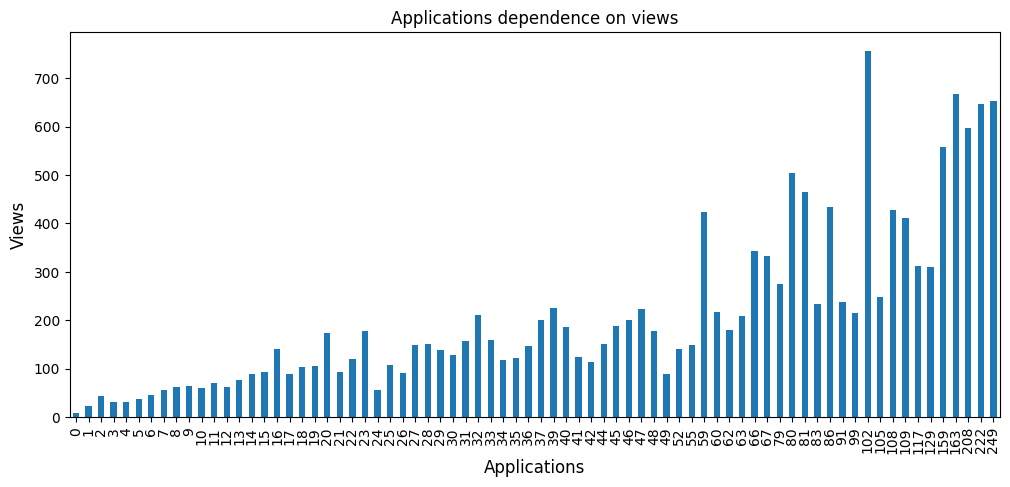

In [44]:
views_applications = vacancies.groupby("applications")["views"].mean()
views_applications.plot.bar(figsize=(12,5), title="Applications dependence on views")
plt.xlabel("Applications", fontsize=12)
plt.ylabel("Views", fontsize=12)
plt.show()